Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this book are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.01 Frequency, Amplitude, and Phase</font>

# <font color=red>Give it a TRY!</font>
# <font color=red>Part 3</font>

### Setup

In [12]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

time_length = 1 # second
sampling_interval = 0.001 # second

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))


## <font color=red>DSP.01.G3) Spatial Data</font>

### <font color=red>DSP.01.G3.a) The Frequency of a Spatial Pattern</font>

Take a look at this image.

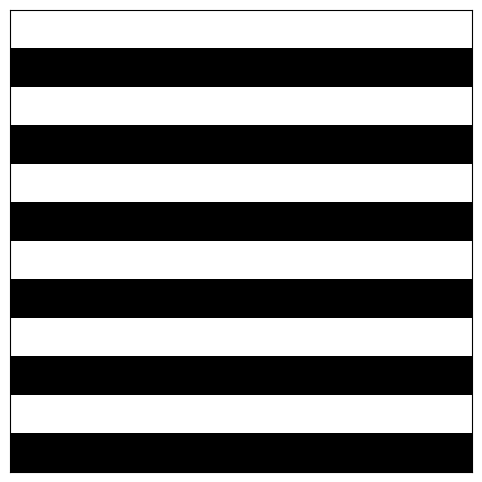

In [13]:
X = np.array([
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0]
])

make_imshow(X)

plt.show() 

Fill in the blanks:    **Double click on this cell to write in your answer**

Think of the image above as a 2D surface - a wall or floor. We can think of the surface as having a spatial
frequency. How many full cycles are there? The horizontal lines alternate vertically, changing from black to white ______ times. If this image spans 1 meter vertically, in the vertical direction that is a spatial frequency of ______ cycles per meter.

Take a look at this plot.

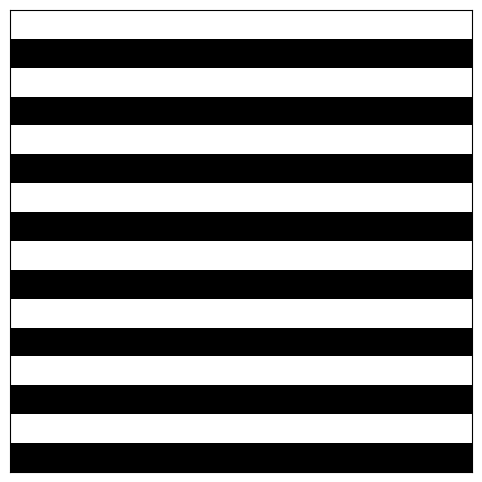

In [14]:
X = np.array([
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

make_imshow(X)

plt.show()

Fill in the blanks:  **Double click on this cell to write in your answer**

Think of the image above as a 2D surface - a wall or floor. We can think of the surface as having a spatial
frequency. The horizontal lines complete ______ full black-and-white cycles. If this image spans 1 meter vertically, in the vertical direction that is a spatial frequency of ______ cycles per meter.

Take a look at this plot.

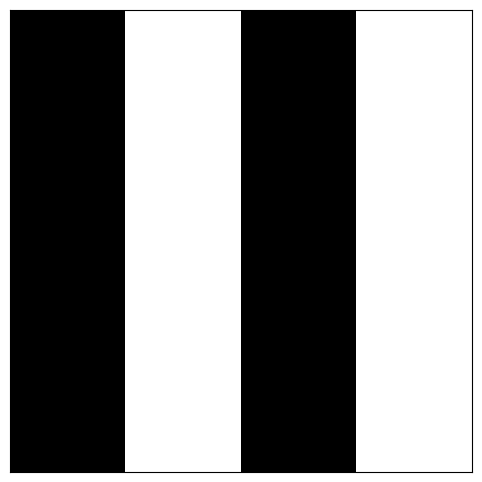

In [15]:
X = np.array([    
    [0,255,0,255],
    [0,255,0,255],
    [0,255,0,255],
    [0,255,0,255]
])

make_imshow(X)

plt.show()

Fill in the blanks:   **Double click on this cell to write in your answer**

Think of the image above as a 2D surface - a wall or floor. We can think of the surface as having a spatial
frequency. The vertical lines alternate horizontally between black-and-white ______  times. If this image spans 1 meter horizontally, in the horizontal direction that is a spatial frequency of ______ cycles per meter.

So you've just figured out that we can talk about frequency in space the same way we talk about it in time. That's all there is to it.

### <font color=red>DSP.01.G3.b) The Frequency of a Spatial Pattern -2D</font>

In the previous examples, we considered only one dimension of the spatial pattern (in fact, the spatial
frequency in the other direction was zero = no change as a function of distance = constant values, either all white or all black).

Plot this function. Note that we're now using a sine wave to control brightness and that we're changing two parameters (x and y) instead of a single parameter.

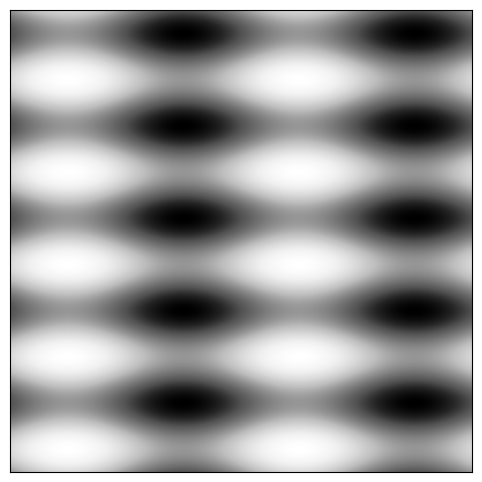

In [16]:
x = np.arange(0,time_length, sampling_interval)
y = np.arange(time_length, 0, -sampling_interval)

X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 2 * X) +  np.sin(2*np.pi * 5 * Y)

make_imshow(Z)

plt.show()

Do you see two spatial frequencies - one in the horizontal direction and one in the vertical direction?
What are the two spatial frequencies?

Hint: Take a look at this plot.

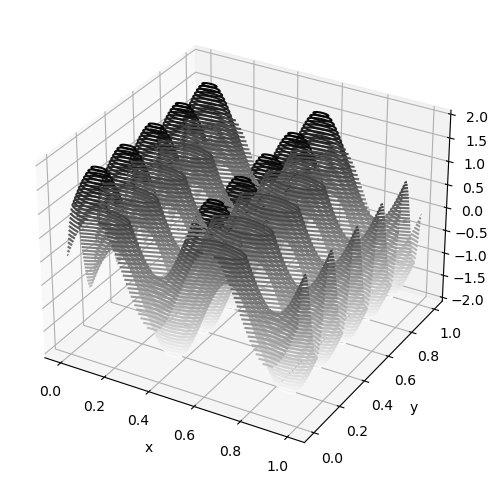

In [17]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(0,time_length, sampling_interval)
y = np.arange(0,time_length, sampling_interval)
X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 2 * X) +  np.sin(2*np.pi * 5 * Y)

ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

This is the same function, plotted in 3D. In other words, what was gray-scale brightness in the 2D plot above now controls position on the Z axis as well as brightness. Look at the spatial series from left to right (along the X axis).
Follow the waves. How many complete periods do you count?

Plot the same function, viewing the 3D plot from a different orientation.

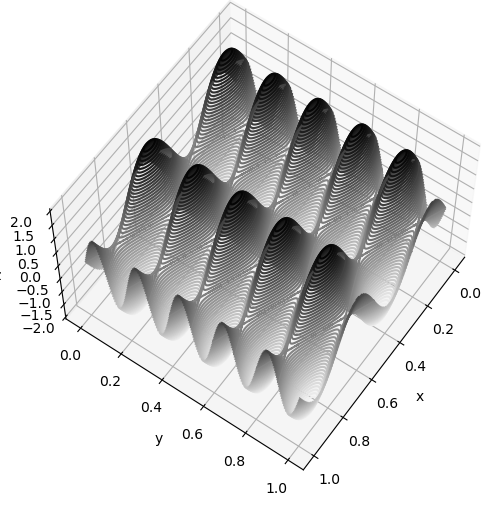

In [18]:
ax.view_init(60, 35)
fig

Look at the spatial series from left to right (along the Y axis). Follow the waves. How many complete periods do you count? Write your answer here. **Double click on this cell to write in your answer**

Assuming the unit of distance for each axis is 1 meter, fill in the X-axis ______ and Y-axis ______ spatial
frequencies.

### <font color=red>DSP.01.G3.c) The Frequency of a Spatial Pattern -2D</font>

Plot the function below. Note that there are two parameters (x and y) instead of a single parameter.

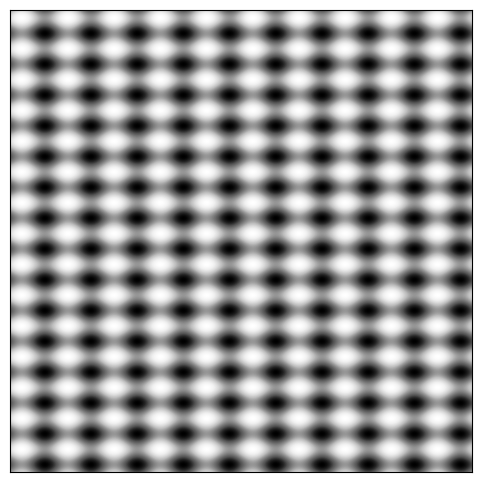

In [19]:
x = np.arange(0,time_length, sampling_interval)
y = np.arange(0,time_length, sampling_interval)

X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X) +  np.sin(2*np.pi * 15 * Y)

make_imshow(Z)

plt.show()

Do you see two spatial frequencies - one in the horizontal direction and one in the vertical direction? If the unit of distance is 1 meter, what are the two spatial frequencies?

Hint: Take a look at this plot.

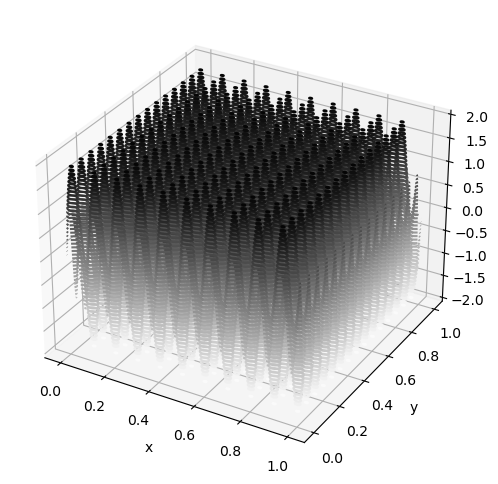

In [20]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(0,time_length, sampling_interval)
y = np.arange(0,time_length, sampling_interval)

X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X) +  np.sin(2*np.pi * 15 * Y)

ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

This is the same function, plotted in 3D. Look at the spatial series from left to right (along the X axis). Follow the waves.
How many complete periods do you count?

Plot the same function, viewing the 3D plot from a different orientation.

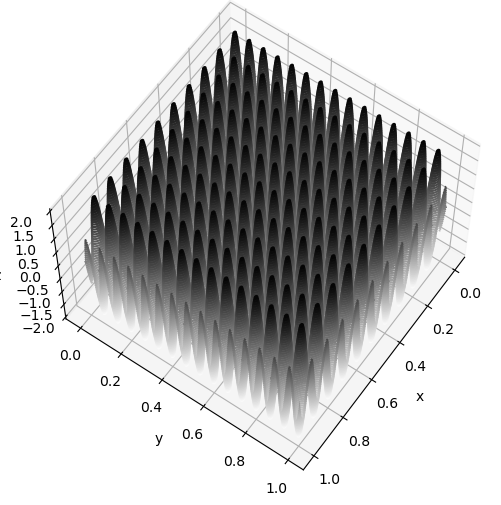

In [21]:
ax.view_init(60, 35)
fig

How many complete periods do you count?

Write your answer below. Assuming the unit of distance for each axis is 1 meter, fill in the X-axis ______ and Y-axis ______ spatial frequencies.

### <font color=red>DSP.01.G3.d) The Frequency of a Spatial Pattern -2D</font>

Copy and paste below code cells from the above examples and create and plot a spatial series - 4 cycles per meter in one direction and 8 cycles per meter in the other direction. 

Plot the spatial series in 3D. Adjust the orientation until you clearly see both frequencies.

### <font color=red>DSP.01.G3.e) The Frequency of a Spatial Pattern -2D</font>

Go online and search for something like 'number of cycles per degree of visual angle'.

Write a few sentences about how you would define spatial frequency in a visual experiment.

**Double click on this cell to write in your answer**